<h1>Mini Projeto 02 - Média Alunos</h1>

 <h3><b>1)</b> • Importação de Biblioteca e Extração </h3>
 

<i> 
<b>1)Importação de Biblioteca e Extração</b><br>
• Importe o Pandas<br>
• Importe o Numpy<br>
• Importe o Matplotlib.pyplot<br>
• Importar o arquivo Excel<br>
• Não remover a Primeira, utilizar a primeira como cabeçalho <br></i>

<i><b>2) Transformação de dados<br></b>
• Remover coluna Idade<br>
• Ajustar os nomes das colunas<br>
• Criar uma Coluna Média<br>
• Criar uma Coluna Status (Aprovado, Exame e Reprovado) <br>
• Criar uma Coluna Maior e Menor nota<br></i>
    
<i><b>3) Gráficos e Dataset agrupados<br></b>
• Criar gráfico barra com as médias de cada aluno<br>
• Criar um outro dataframe, com status agrupado<br>
• Criar um gráfico barra, com a quantidade de Aprovados, Reprovados e Exame<br>
• Criar um gráfico pizza, com a porcentagem de Aprovados, Reprovados e Exame<br></i>
    


In [1]:
#Importando o Pandas, Importando o Excel 
#Importando o Matplotlib para criar gráfico
#skiprows - principais linhas a serem removidas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_excel('notas_alunos.xlsx',skiprows=0)
display(dataset)


# ==================================
#   SE TIVESSE LINHA EM BRANCO
# ==================================

#dataset = dataset.dropna(how='all')
#display(dataset)

#observação
#se e quisesse remover a linha que tiver qualquer NaN eu colocaria dataset = dataset.dropna(how='any')

,Col.Aluno,Matéria:Matemática,Matéria:Portugues,Matéria:História,Matéria:Ciências,Matéria: Geografia,Idade
0,João,2,5,0,5,1,10
1,Pedro,3,6,0,6,2,9
2,Maria,4,5,4,7,3,9
3,Lucas,5,6,5,8,4,9
4,Rute,7,5,6,7,5,9
5,Claudia,7,4,6,6,6,10
6,Jorge,6,5,7,5,7,9
7,Vinicius,6,6,8,10,8,10
8,Laura,6,10,9,10,9,10
9,Lenita,7,9,8,7,10,10


<h3><b>2) Transformação de dados<br></b></h3>

In [2]:
# ===== REMOVER COLUNA IDADE =====

dataset = dataset.drop(['Idade'], axis=1)
display(dataset)

,Col.Aluno,Matéria:Matemática,Matéria:Portugues,Matéria:História,Matéria:Ciências,Matéria: Geografia
0,João,2,5,0,5,1
1,Pedro,3,6,0,6,2
2,Maria,4,5,4,7,3
3,Lucas,5,6,5,8,4
4,Rute,7,5,6,7,5
5,Claudia,7,4,6,6,6
6,Jorge,6,5,7,5,7
7,Vinicius,6,6,8,10,8
8,Laura,6,10,9,10,9
9,Lenita,7,9,8,7,10


In [3]:
# ===== RENOMEAR COLUNAS =====

dataset = dataset.rename(columns={
    'Col.Aluno':'Aluno',
    'Matéria:Matemática':'Matemática',
    'Matéria:Portugues':'Português',
    'Matéria:História':'História',
    'Matéria:Ciências':'Ciências',
    'Matéria: Geografia':'Geografia'
})
display(dataset)

,Aluno,Matemática,Português,História,Ciências,Geografia
0,João,2,5,0,5,1
1,Pedro,3,6,0,6,2
2,Maria,4,5,4,7,3
3,Lucas,5,6,5,8,4
4,Rute,7,5,6,7,5
5,Claudia,7,4,6,6,6
6,Jorge,6,5,7,5,7
7,Vinicius,6,6,8,10,8
8,Laura,6,10,9,10,9
9,Lenita,7,9,8,7,10


In [4]:
# ===== CRIAÇÃO DA COLUNA MÉDIA =====

dataset['Média'] = dataset.mean(axis=1)
#display(dataset)

,Aluno,Matemática,Português,História,Ciências,Geografia,Média
0,João,2,5,0,5,1,2.6
1,Pedro,3,6,0,6,2,3.4
2,Maria,4,5,4,7,3,4.6
3,Lucas,5,6,5,8,4,5.6
4,Rute,7,5,6,7,5,6.0
5,Claudia,7,4,6,6,6,5.8
6,Jorge,6,5,7,5,7,6.0
7,Vinicius,6,6,8,10,8,7.6
8,Laura,6,10,9,10,9,8.8
9,Lenita,7,9,8,7,10,8.2


In [5]:
# ===== CRIAÇÃO DA COLUNA STATUS =====

dataset['Status'] = np.where(dataset['Média']>=7, 'Aprovado',
                    np.where(dataset['Média']<=4,'Reprovado','Exame'))
display(dataset)

,Aluno,Matemática,Português,História,Ciências,Geografia,Média,Status
0,João,2,5,0,5,1,2.6,Reprovado
1,Pedro,3,6,0,6,2,3.4,Reprovado
2,Maria,4,5,4,7,3,4.6,Exame
3,Lucas,5,6,5,8,4,5.6,Exame
4,Rute,7,5,6,7,5,6.0,Exame
5,Claudia,7,4,6,6,6,5.8,Exame
6,Jorge,6,5,7,5,7,6.0,Exame
7,Vinicius,6,6,8,10,8,7.6,Aprovado
8,Laura,6,10,9,10,9,8.8,Aprovado
9,Lenita,7,9,8,7,10,8.2,Aprovado


In [6]:
dataset['Maior Nota'] = dataset.max(axis=1)
display(dataset)

,Aluno,Matemática,Português,História,Ciências,Geografia,Média,Status,Maior Nota
0,João,2,5,0,5,1,2.6,Reprovado,5.0
1,Pedro,3,6,0,6,2,3.4,Reprovado,6.0
2,Maria,4,5,4,7,3,4.6,Exame,7.0
3,Lucas,5,6,5,8,4,5.6,Exame,8.0
4,Rute,7,5,6,7,5,6.0,Exame,7.0
5,Claudia,7,4,6,6,6,5.8,Exame,7.0
6,Jorge,6,5,7,5,7,6.0,Exame,7.0
7,Vinicius,6,6,8,10,8,7.6,Aprovado,10.0
8,Laura,6,10,9,10,9,8.8,Aprovado,10.0
9,Lenita,7,9,8,7,10,8.2,Aprovado,10.0


In [7]:
dataset['Menor nota'] = dataset.min(axis=1)
display(dataset)

,Aluno,Matemática,Português,História,Ciências,Geografia,Média,Status,Maior Nota,Menor nota
0,João,2,5,0,5,1,2.6,Reprovado,5.0,0.0
1,Pedro,3,6,0,6,2,3.4,Reprovado,6.0,0.0
2,Maria,4,5,4,7,3,4.6,Exame,7.0,3.0
3,Lucas,5,6,5,8,4,5.6,Exame,8.0,4.0
4,Rute,7,5,6,7,5,6.0,Exame,7.0,5.0
5,Claudia,7,4,6,6,6,5.8,Exame,7.0,4.0
6,Jorge,6,5,7,5,7,6.0,Exame,7.0,5.0
7,Vinicius,6,6,8,10,8,7.6,Aprovado,10.0,6.0
8,Laura,6,10,9,10,9,8.8,Aprovado,10.0,6.0
9,Lenita,7,9,8,7,10,8.2,Aprovado,10.0,7.0


<h3> <b>3) Gráficos e Dataset agrupado<br></b> </h3>

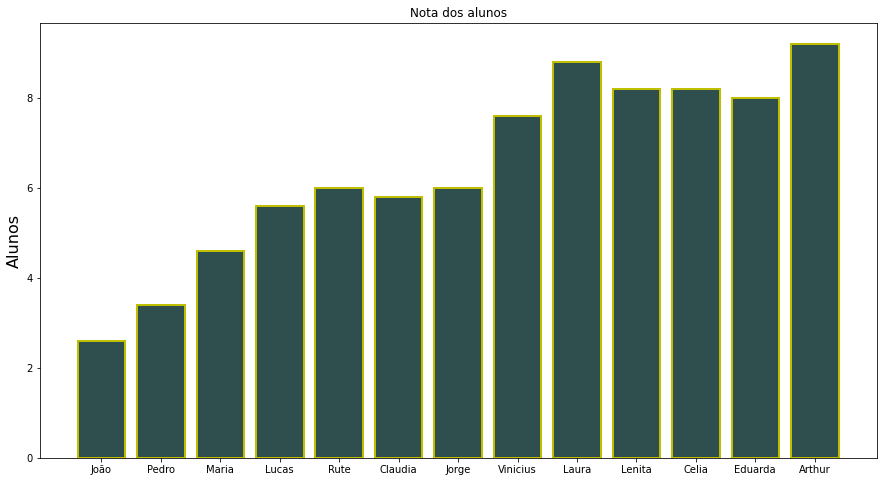

In [8]:
#contagem_status_agrupado = dataset.groupby('Status').count()
plt.figure(figsize=(15,8))
plt.title('Nota dos alunos')
plt.bar(dataset['Aluno'],dataset['Média'] , color='darkslategray', edgecolor='y', linewidth=2)
plt.ylabel('Alunos', fontsize='16')
plt.savefig('Gráfico_Barra.png', dpi=600)


plt.show()



In [11]:
status_agrupado = dataset.groupby('Status')
status_agrupado = status_agrupado.count() 
status_agrupado = status_agrupado.drop(['Matemática','Português','História','Ciências','Geografia','Média','Maior Nota','Menor nota'], axis=1)
display(status_agrupado)

,Aluno
Status,
Aprovado,6
Exame,5
Reprovado,2


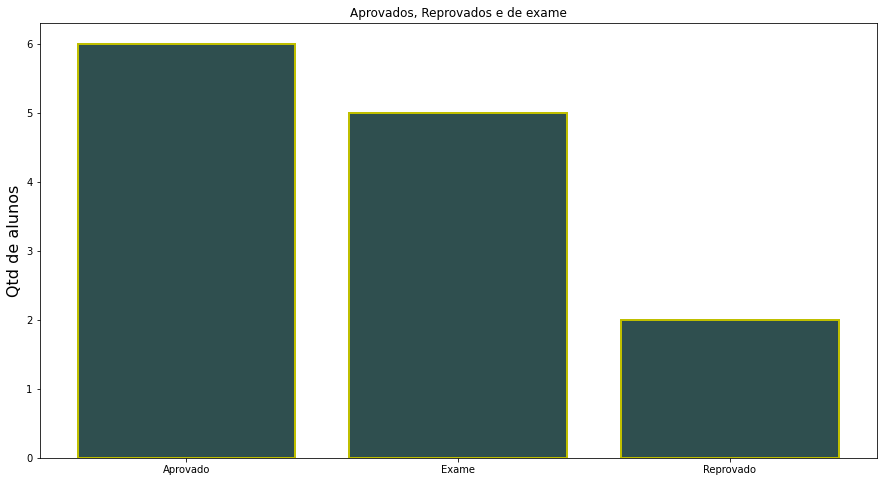

In [14]:
plt.figure(figsize=(15,8))
plt.title('Aprovados, Reprovados e de exame')
plt.bar(status_agrupado.index, status_agrupado['Aluno'], color='darkslategray', edgecolor='y', linewidth=2)
plt.ylabel('Qtd de alunos', fontsize='16')
plt.savefig('Gráfico_Barra.png', dpi=600)


plt.show()


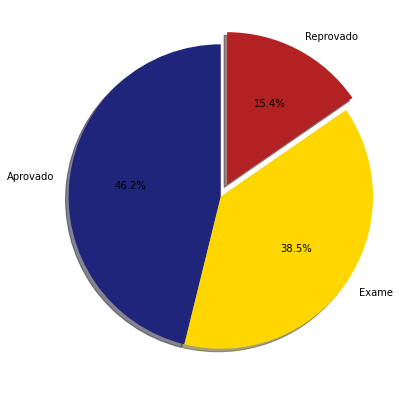

In [13]:
#Criação de Variável para destacar os que estão em EXAME
explode= (0,0,0.09)

fig = plt.figure(figsize =(10, 7)) 
plt.pie(x=status_agrupado['Aluno'], labels = status_agrupado.index, explode = explode,colors = ["#20257c", "#FFD700", "#B22222"],  autopct='%1.1f%%', startangle=90, shadow=True)
plt.show() 
